In [1]:
import MinMax2 as mm
import os
import time

## General Methods to Calculate Minimum Removal Sets
There are a few ways to calculate How many removals it takes to get a graph into a failure state

In [2]:
E = {
    2:[6],
    6:[0,3],
    0:[1],
    3:[4],
    1:[0,4],
    5:[1],
    7:[],
    8:[],
    9:[10,11],
    11:[10],
    12:[11,9,10]
}

In [3]:
Sym = 'Chi'
Typ= 'V'
K = 2

#example graph
H = Graph(E)


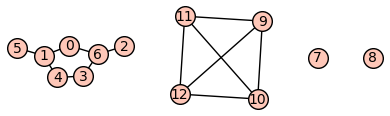

In [4]:
show(H)

In [5]:
#the most straight forward and basic method is to use MinMax()
num = mm.MinMax(H,sym=Sym,typ=Typ,k=K)
print(f"To get H into failstate of {Sym}<{K} I need to remove {num} {Typ}'s")

To get H into failstate of Chi<2 I need to remove 3 V's


In [6]:
#This tends to be slow when dealing with multiple components and singletons so there are alternatives

#MinMaxComp() broadcast the MinMax() on all connected components and returns the sum
num = mm.MinMaxComp(H)
print(f"To get H into failstate of {Sym}<{K} I need to remove {num} {Typ}'s")

To get H into failstate of Chi<2 I need to remove 3 V's


## Precomputing Parameters for Graph Components
After some time I found it convenient to precompute some values and sets to speed things up. There are 2 main things that are good to precompute
- The $G(n,m)$ sets
- Paramaters on all possible connected components $H$ with $\text{Ord}(H)\leq n$ for some $n$

These have to be computed in that order since the components are brought in from the $G(n,m)$ sets

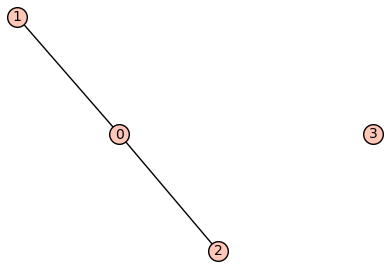

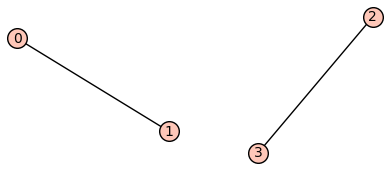

In [7]:
#Making the Gnm sets is done by simply giving an n, then for each ni<n all possible G(ni,mi) are 
#calculate for 0<=mi<=Choose(ni,2)

#note that n=1,n=2 are uninteresting so GG starts with n=3
#also m=0,m=1,m=C(n,2),m=C(n,2)-1 arent interesting either

#to just get a map Dict[n][m] => Gnm list use GetGG(n), theres also multithreading options
GG4 = mm.GetGG(4)
for i in GG4[4][2]:
    show(i)

In [9]:
#To save the GGfile trun GenGG(), this pickles a file with the Gnm data aswell as runtime info
#the argument are the same as GetGG()
path = os.getcwd()+"/SampleData"
mm.GenGG(4,dirs=path)

Saving to file: /home/rod/Dev/PersonalProjects/NatesNetworks/SampleData/GG_n4.pkl


Note that there are helper functions FindGG() to get the name of the biggest (in terms of n) GG file in a directory and LoadGG() which does the same thing but actualy unpickles the file.

In [11]:
mm.FindGG(dirs=path)

'GG_n4.pkl'

In [13]:
GG4 = mm.LoadGG(dirs=path)
GG4

{'runtime(sec)': 0.024823474999948303,
 'Data': {1: {0: [Graph on 1 vertex]},
  2: {0: [Graph on 2 vertices], 1: [Graph on 2 vertices]},
  3: {0: [Graph on 3 vertices],
   1: [Graph on 3 vertices],
   2: [Graph on 3 vertices],
   3: [Graph on 3 vertices]},
  4: {0: [Graph on 4 vertices],
   1: [Graph on 4 vertices],
   2: [Graph on 4 vertices, Graph on 4 vertices],
   3: [Graph on 4 vertices, Graph on 4 vertices, Graph on 4 vertices],
   4: [Graph on 4 vertices, Graph on 4 vertices],
   5: [Graph on 4 vertices],
   6: [Graph on 4 vertices]}}}

Now that there is a GG_n#.pkl file in the directory I compute the paramaters on all connected components found in all these Gnm sets.



In [15]:
#this function is CompLibSingleK() it needs the paramater specified (type of coloring, vertex/edge removals,
#and what k to use)
Sym = 'Chi'
Typ = 'V'
K = 2

CompLib = mm.CompLibSingleK(4,sym=Sym,typ=Typ,k=K,dirs=path)

In [16]:
#Note that the reason n has to be passed is because CompLib will try to generate any Gnm sets not
#found in the detected GG file
CompLib = mm.CompLibSingleK(5,sym=Sym,typ=Typ,k=K,dirs=path)

Found GG file does not contain the set G(5,0)
Will start to generate one now
Done Generating G(5,0)
Found GG file does not contain the set G(5,1)
Will start to generate one now
Done Generating G(5,1)
Found GG file does not contain the set G(5,2)
Will start to generate one now
Done Generating G(5,2)
Found GG file does not contain the set G(5,3)
Will start to generate one now
Done Generating G(5,3)
Found GG file does not contain the set G(5,4)
Will start to generate one now
Done Generating G(5,4)
Found GG file does not contain the set G(5,5)
Will start to generate one now
Done Generating G(5,5)
Found GG file does not contain the set G(5,6)
Will start to generate one now
Done Generating G(5,6)
Found GG file does not contain the set G(5,7)
Will start to generate one now
Done Generating G(5,7)
Found GG file does not contain the set G(5,8)
Will start to generate one now
Done Generating G(5,8)
Found GG file does not contain the set G(5,9)
Will start to generate one now
Done Generating G(5,9)


CompLib now is a map
Dict[k][n][m][H] => Chi_V^K(H)
any issues with isomorphism double counting are already taken care of so each H should be unique.
To use multiple Ks use GetCompLib()

This can also be multithreaded, each core working on a single K

In [19]:
# GetCompLib needs a list or range of Ks to use
CompLib = mm.GetCompLib(np=4,sym=Sym,typ=Typ,ks=[2,3],dirs=path)
#CompLib = mm.GetCompLib(np=4,sym=Sym,typ=Typ,ks=[2,3],dirs=path,multi=True,threads=2)

In [20]:
#Similar to the GenGG() auto pickling GG data ina nice ditc, GenCompLib() packages CompLib data
#into a nice dictionary with some data

mm.GenCompLib(np=4,sym=Sym,typ=Typ,ks=[2,3,4],dirs=path)

Saving to file: /home/rod/Dev/PersonalProjects/NatesNetworks/SampleData/CompLib_n4_Chi_V_k2-4.pkl


In [22]:
#there is also a FindCompLib() to find the name of largest CompLib and LoadCompLib() to load
#the largest CompLib file
CompLibFile = mm.LoadCompLib(sym='Chi',typ='V',dirs=path)
CompLib = CompLibFile['Data']

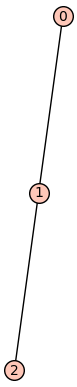

0

In [32]:
#Now that there is a CompLib that maps
# Dict[k][n][m][H] => Sym_#^k(H) for each connected component H with n vertices and m edges
#MinMaxLooUp() takes a graph H and a map 
# Dict[n][m][H] => #
#The ide here is that if the correct subdictionary of CompLib is passed this calculates
#MinMax by just refrenceing precomputed values

#because of the way CompLib is made CompLib[2] is associated with vertex removals to get Chi under 2
CompL = CompLib[2]

H = graphs.RandomGNM(3,2)

show(H)

mm.MinMaxLookUp(H,CompL)

In [33]:
#There is also an experimental version of GenCompLib called GenCompLibExp, that does much the same thing but
# is more suitable for multithreading by divvying up all the graphs among each core
#this more upfront cost though so it is slower for small n, i find it helpfull for
#n more than 6 or 7